# 4) Machine Learning for Red and White wine

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm,tree
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

import operator
from sklearn import tree
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
red = pd.read_csv('winequality-red.csv', low_memory=False, sep=';')
white = pd.read_csv('winequality-white.csv', low_memory=False, sep=';')

In [3]:
# Function to select red or white dataset
def call(functionToCall):
    print('\nRed Wine\n')
    functionToCall(red)
    print('\nWhite Wine\n')
    functionToCall(white)

In [4]:
# Remove spaces from column names
def rm(wine_set):
    wine_set.columns = [x.strip().replace(' ','_') for x in wine_set.columns]
call(rm)


Red Wine


White Wine



## Logistic Regression

In [5]:
def log_regression(wine_set):
    # local variable to identify if the wine_set red or white
    w = wine_set


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)


    # split into training and testing sets
    predictors = wine_set[['sulphates', 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = LogisticRegression()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

     # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('----------------Logistic Regression------------------------')
call(log_regression)

----------------Logistic Regression------------------------

Red Wine

Confusion Matrix:
 [[204  91]
 [100 245]]
Accuracy: 0.7015625
Score: 0.7015625
RMSE: 0.546294334585304

White Wine

Confusion Matrix:
 [[ 217  402]
 [ 194 1147]]
Accuracy: 0.6959183673469388
Score: 0.6959183673469388
RMSE: 0.5514359733033938


## Decision Tree

In [6]:
def decis_tree(wine_set):
    # local variable to identify if the wine_set red or white
    w = wine_set


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)


    # split into training and testing sets
    predictors = wine_set[['residual_sugar', 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = DecisionTreeClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

     # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('----------------Decision Tree------------------------')
call(decis_tree)

----------------Decision Tree------------------------

Red Wine

Confusion Matrix:
 [[223  78]
 [127 212]]
Accuracy: 0.6796875
Score: 0.6796875
RMSE: 0.5659615711335886

White Wine

Confusion Matrix:
 [[ 394  272]
 [ 287 1007]]
Accuracy: 0.7147959183673469
Score: 0.7147959183673469
RMSE: 0.5340450183576784


## K Nearest Neighbors

In [7]:
def knn(wine_set):
    
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[['residual_sugar', 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    
    
    # build model on training data
    classifier = KNeighborsClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

    
print('----------------KNN------------------------')
call(knn)

----------------KNN------------------------

Red Wine

Confusion Matrix:
 [[193 110]
 [ 95 242]]
Accuracy: 0.6796875
Score: 0.6796875
RMSE: 0.5659615711335886

White Wine

Confusion Matrix:
 [[ 304  368]
 [ 238 1050]]
Accuracy: 0.6908163265306122
Score: 0.6908163265306122
RMSE: 0.5560428701722446


## Naive Bayes

In [8]:
def naive(wine_set):
   
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[['density', 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    

    classifier = GaussianNB()
    classifier.fit(pred_train, tar_train)
    predictionsG = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsG))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsG))
    print('Gaus:' + str(classifier.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsG, tar_test)
    print('MSE:',mse ** 0.5)

    classifierm = MultinomialNB()
    classifierm.fit(pred_train, tar_train)
    predictionsM = classifierm.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsM))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsM))
    print('Multi:' + str(classifierm.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsM, tar_test)
    print('MSE:',mse ** 0.5)

    classifierb = BernoulliNB()
    classifierb.fit(pred_train, tar_train)
    predictionsB = classifierb.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsB))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsB))
    print('Bernoulli:' + str(classifierb.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsB, tar_test)
    print('MSE:',mse ** 0.5)

    
print('----------------Naive Bayes------------------------')
call(naive)    

----------------Naive Bayes------------------------

Red Wine

Confusion Matrix:
 [[224  69]
 [110 237]]
Accuracy: 0.7203125
Gaus:0.7203125
MSE: 0.5288548950326545

Confusion Matrix:
 [[145 148]
 [ 86 261]]
Accuracy: 0.634375
Multi:0.634375
MSE: 0.6046693311223912

Confusion Matrix:
 [[ 27 266]
 [ 31 316]]
Accuracy: 0.5359375
Bernoulli:0.5359375
MSE: 0.6812213296719356

White Wine

Confusion Matrix:
 [[ 365  290]
 [ 267 1038]]
Accuracy: 0.7158163265306122
Gaus:0.7158163265306122
MSE: 0.5330888044870083

Confusion Matrix:
 [[ 263  392]
 [ 266 1039]]
Accuracy: 0.6642857142857143
Multi:0.6642857142857143
MSE: 0.5794085654478071

Confusion Matrix:
 [[   0  655]
 [   0 1305]]
Accuracy: 0.6658163265306123
Bernoulli:0.6658163265306123
MSE: 0.5780862162942374


## Random Forest

----------------Random Forests------------------------

Red Wine

Confusion matrix:
 [[227  65]
 [ 47 301]]
Accuracy: 0.825

Importance of predictors:
[('alcohol', 0.15871757887808177), ('sulphates', 0.1089766933317686), ('volatile_acidity', 0.10706984282162524), ('total_sulfur_dioxide', 0.09634778209988981), ('density', 0.09102697149242822), ('citric_acid', 0.08575679335997946), ('chlorides', 0.07879355795866243), ('pH', 0.07329074087234552), ('fixed_acidity', 0.07041646431428307), ('residual_sugar', 0.06954498471038195), ('free_sulfur_dioxide', 0.06005859016055387)]


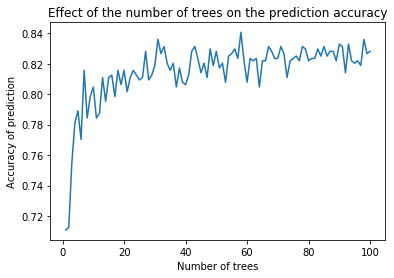

[0.7109375, 0.7125, 0.7546875, 0.78125, 0.7890625, 0.7703125, 0.815625, 0.784375, 0.7984375, 0.8046875, 0.784375, 0.7875, 0.8109375, 0.7953125, 0.8109375, 0.8125, 0.7984375, 0.815625, 0.80625, 0.815625, 0.8015625, 0.8109375, 0.815625, 0.8125, 0.809375, 0.8109375, 0.828125, 0.809375, 0.8125, 0.81875, 0.8359375, 0.8265625, 0.83125, 0.8203125, 0.815625, 0.8203125, 0.8046875, 0.8171875, 0.8078125, 0.80625, 0.8125, 0.828125, 0.83125, 0.8234375, 0.8140625, 0.8203125, 0.8109375, 0.8296875, 0.81875, 0.828125, 0.8171875, 0.8203125, 0.8078125, 0.825, 0.8265625, 0.8296875, 0.8234375, 0.840625, 0.821875, 0.8078125, 0.8234375, 0.821875, 0.8234375, 0.8046875, 0.821875, 0.821875, 0.83125, 0.828125, 0.8234375, 0.8234375, 0.83125, 0.8265625, 0.8109375, 0.821875, 0.8234375, 0.825, 0.821875, 0.83125, 0.8296875, 0.821875, 0.8234375, 0.8234375, 0.8296875, 0.825, 0.83125, 0.825, 0.828125, 0.828125, 0.821875, 0.8328125, 0.83125, 0.8140625, 0.8328125, 0.821875, 0.8203125, 0.821875, 0.81875, 0.8359375, 0.82656

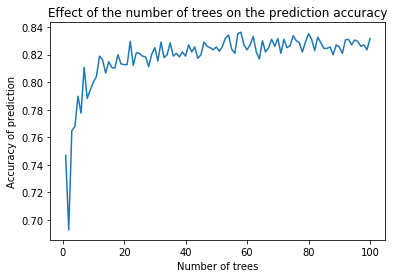

[0.746938775510204, 0.6928571428571428, 0.764795918367347, 0.7678571428571429, 0.789795918367347, 0.7775510204081633, 0.8107142857142857, 0.7882653061224489, 0.7943877551020408, 0.8, 0.8040816326530612, 0.8188775510204082, 0.8163265306122449, 0.8066326530612244, 0.814795918367347, 0.8107142857142857, 0.810204081632653, 0.8198979591836735, 0.813265306122449, 0.8127551020408164, 0.8127551020408164, 0.8295918367346938, 0.8122448979591836, 0.8214285714285714, 0.8209183673469388, 0.8188775510204082, 0.8183673469387756, 0.8112244897959183, 0.8204081632653061, 0.825, 0.8153061224489796, 0.8290816326530612, 0.8178571428571428, 0.8198979591836735, 0.8285714285714286, 0.8188775510204082, 0.8209183673469388, 0.8183673469387756, 0.8219387755102041, 0.8188775510204082, 0.8270408163265306, 0.8219387755102041, 0.8255102040816327, 0.8173469387755102, 0.8198979591836735, 0.8290816326530612, 0.8260204081632653, 0.825, 0.823469387755102, 0.8255102040816327, 0.8224489795918367, 0.8260204081632653, 0.83214

In [9]:
def random_forests(wine_set):
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[['density', 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]

    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data#
    classifier = RandomForestClassifier(n_estimators=25)
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('Confusion matrix:\n', sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:', sklearn.metrics.accuracy_score(tar_test, predictions))

    # to display the relative importance of each predictive variable
    model = ExtraTreesClassifier()
    model.fit(pred_train, tar_train)

    print('\nImportance of predictors:')
    dct = dict()
    for c in range(len(predictors.columns)):
        dct[predictors.columns[c]] = model.feature_importances_[c]
    print(sorted(dct.items(), key=operator.itemgetter(1), reverse=True))

    # run different numbers of trees to see the effect of the number on the accuracy of the prediction
    n = 100
    accuracy = [0]*n

    for i in range(n):
        classifier = RandomForestClassifier(n_estimators=i+1)
        classifier = classifier.fit(pred_train, tar_train)
        predictions = classifier.predict(pred_test)
        accuracy[i] = sklearn.metrics.accuracy_score(tar_test, predictions)

    plt.plot(range(1, n+1), accuracy)
    plt.xlabel('Number of trees')
    plt.ylabel('Accuracy of prediction')
    plt.title('Effect of the number of trees on the prediction accuracy')
    plt.show()

    print(accuracy)

print('----------------Random Forests------------------------')
call(random_forests)

## Lasso Regression

----------------Lasso Regression------------------------

Red Wine

Predictors and their regression coefficients:
density : -0.020095347815245374
alcohol : 0.29312748593623933
sulphates : 0.13551717868691346
pH : -0.0278025630134146
volatile_acidity : -0.19031297553741983
chlorides : -0.08393917245157378
fixed_acidity : 0.0
citric_acid : 0.0
residual_sugar : 0.017520691488967247
free_sulfur_dioxide : 0.0
total_sulfur_dioxide : -0.07928212046868238

Alpha: 0.000247999475189142


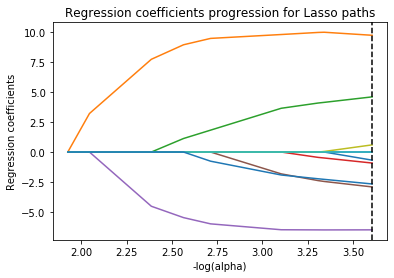

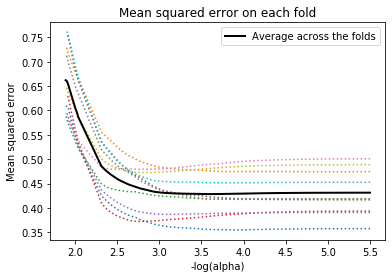


Mean squared error for training data: 0.4203875908920114
Mean squared error for test data: 0.4218140045517257

R-square for training data: 0.36296411276202817
R-square for test data: 0.33280737417126005

White Wine

Predictors and their regression coefficients:
density : -0.24939511143228177
alcohol : 0.33030255779751333
sulphates : 0.06748773072115549
pH : 0.057857467498302194
volatile_acidity : -0.19002207866367526
chlorides : -0.004067080798942585
fixed_acidity : 0.0
citric_acid : 0.0
residual_sugar : 0.2949812850759552
free_sulfur_dioxide : 0.05520792036549526
total_sulfur_dioxide : -0.01300673532891413

Alpha: 9.211601493058567e-05


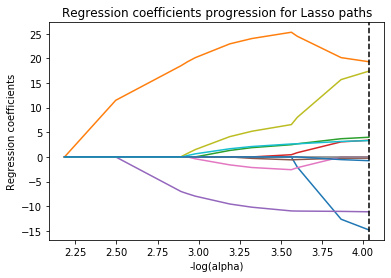

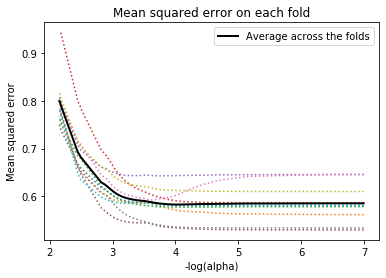


Mean squared error for training data: 0.5763917424436986
Mean squared error for test data: 0.5387294766360478

R-square for training data: 0.2784951594704026
R-square for test data: 0.28165901553327566


In [10]:
def lasso_regr(wine_set):

    pred = wine_set[['density', 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                    'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    predictors = pred.copy()
    targets = wine_set.quality

    # standardize predictors to have mean=0 and sd=1
    predictors = pd.DataFrame(preprocessing.scale(predictors))
    predictors.columns = pred.columns
    # print(predictors.head())

    # split into training and testing sets
    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.3, random_state=123)

    # specify the lasso regression model
    model = LassoLarsCV(cv=10, precompute=False).fit(pred_train, tar_train)

    print('Predictors and their regression coefficients:')
    d = dict(zip(predictors.columns, model.coef_))
    for k in d:
        print(k, ':', d[k])

    # plot coefficient progression
    m_log_alphas = -np.log10(model.alphas_)
    # ax = plt.gca()
    plt.plot(m_log_alphas, model.coef_path_.T)
    print('\nAlpha:', model.alpha_)
    plt.axvline(-np.log10(model.alpha_), linestyle='dashed', color='k', label='alpha CV')
    plt.ylabel('Regression coefficients')
    plt.xlabel('-log(alpha)')
    plt.title('Regression coefficients progression for Lasso paths')
    plt.show()

    # plot mean squared error for each fold
    m_log_alphascv = -np.log10(model.cv_alphas_)
    plt.plot(m_log_alphascv, model.mse_path_, ':')
    plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
    plt.legend()
    plt.xlabel('-log(alpha)')
    plt.ylabel('Mean squared error')
    plt.title('Mean squared error on each fold')
    plt.show()

    # Mean squared error from training and test data
    train_error = mean_squared_error(tar_train, model.predict(pred_train))
    test_error = mean_squared_error(tar_test, model.predict(pred_test))
    print('\nMean squared error for training data:', train_error)
    print('Mean squared error for test data:', test_error)

    rsquared_train = model.score(pred_train, tar_train)
    rsquared_test = model.score(pred_test, tar_test)
    print('\nR-square for training data:', rsquared_train)
    print('R-square for test data:', rsquared_test)
#
print('----------------Lasso Regression------------------------')
call(lasso_regr)

## Linear Regression


Red Wine



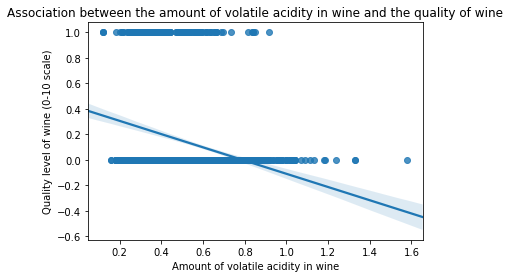

mean of the volatile acidity variable =  0.5278205128205128
mean of the volatile acidity variable after normalization =  3.443843778699673e-17

OLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:
                            OLS Regression Results                            
Dep. Variable:              quality_c   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     126.3
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.96e-28
Time:                        01:07:01   Log-Likelihood:                -494.64
No. Observations:                1599   AIC:                             993.3
Df Residuals:                    1597   BIC:                             1004.
Df Model:                           1                                         
Covariance Type:            nonr

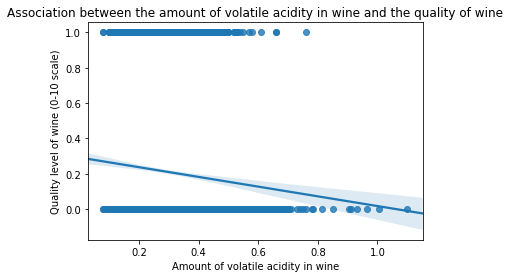

mean of the volatile acidity variable =  0.27824111882400976
mean of the volatile acidity variable after normalization =  4.4245719560398236e-17

OLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:
                            OLS Regression Results                            
Dep. Variable:              quality_c   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     22.23
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           2.49e-06
Time:                        01:07:03   Log-Likelihood:                -2593.3
No. Observations:                4898   AIC:                             5191.
Df Residuals:                    4896   BIC:                             5204.
Df Model:                           1                                         
Covariance Type:            no

In [11]:
def basic_linear(wine_set):
     # recode quality into 2 groups: 0:{3,4,5,6}, 1:{7,8,9}
    recode = {3: 0, 4: 0, 5:0, 6:0, 7:1, 8:1, 9:1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)
    scat0 = sns.regplot(x='volatile_acidity', y='quality_c', fit_reg=True, data=wine_set)
    plt.xlabel('Amount of volatile acidity in wine')
    plt.ylabel('Quality level of wine (0-10 scale)')
    plt.title('Association between the amount of volatile acidity in wine and the quality of wine')
    plt.show()

    # centering the explanatory variable by subrtacting the mean
    f_acidity_mean = wine_set['volatile_acidity'].mean()
    print('mean of the volatile acidity variable = ', f_acidity_mean)
    wine_set['volatile_acidity'] = wine_set['volatile_acidity'] - f_acidity_mean
    print('mean of the volatile acidity variable after normalization = ', wine_set['volatile_acidity'].mean())

    print ('\nOLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:')
    model1 = smf.ols(formula='quality_c ~ volatile_acidity', data=wine_set)
    results1 = model1.fit()
    print(results1.summary())


call(basic_linear)